# 1. Import and access the data

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 6)

In [2]:
# Load and read the data.

main = pd.read_csv('data/movies.csv')
df = main.copy()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


# 2. **Data Cleaning and Preparation**

   - Check for and handle missing values appropriately. You may choose to drop rows with missing values, fill them with appropriate values (e.g., mean,     median), or use advanced imputation techniques.
   - Convert categorical variables into a suitable format for analysis, such as one-hot encoding or label encoding, if necessary.
   - Ensure data types are appropriate for analysis (e.g., numeric data should be represented as numeric types).

In [4]:
# Clean the `released` column and convert to datetime.
# Drop the `year` column as it has no real use

df = df.assign(
    released = pd.to_datetime(df['released'].str.split(r' \(').str[0], errors='ignore')
)
df.drop(columns='year', inplace=True)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.rating.value_counts(dropna=False)

rating
R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
NaN            77
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: count, dtype: int64

In [6]:
# Replace all the ratings that are close in meaning and the na-values with the appropraite values.

df['rating'].replace({
    'Unrated': 'Not Rated',
    'TV-14': 'PG-13',
    'X': 'R',
    'Approved': 'PG',
    'NC-17': 'R',
    'TV-PG': 'PG',
    np.NAN: 'Not rated'
}, inplace=True)
    

In [7]:
df['rating'].value_counts()

rating
R            3723
PG-13        2113
PG           1258
Not Rated     335
G             153
Not rated      77
TV-MA           9
Name: count, dtype: int64

In [8]:
df['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [9]:
# Convert datatypes float to Int.

df['budget'] = df['budget'].fillna(0).astype(int)
df['gross'] = df['gross'].fillna(0).astype(np.int64)
df['votes'] = df['votes'].fillna(0).astype(int)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
# Check for missing data

df.isnull().sum()

name         0
rating       0
genre        0
released     2
score        3
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [11]:
# Check the percentage of missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing * 100, 2)}%')

name - 0.0%
rating - 0.0%
genre - 0.0%
released - 0.03%
score - 0.04%
votes - 0.0%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 0.0%
gross - 0.0%
company - 0.22%
runtime - 0.05%


In [12]:
df.isnull().sum()

name         0
rating       0
genre        0
released     2
score        3
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [13]:
# Count the number of NaN values in each column
na_counts = df.isna().sum(axis=1)

# Select columns with more than 2 NaN values
na_idx = na_counts[na_counts > 0].index
gross_na_idx = df.loc[na_idx][df.gross == 0].index

df.loc[gross_na_idx]

C:\Users\Stewart\AppData\Local\Temp\ipykernel_13656\779562823.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gross_na_idx = df.loc[na_idx][df.gross == 0].index


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
464,White Star,Not rated,Drama,"March 8, 1985",6.0,235,Roland Klick,Karen Jaehne-Lathan,Dennis Hopper,West Germany,100000,0,NaN,92.0
469,Last Plane Out,PG,Action,"September 23, 1983",4.5,131,David Nelson,Ernest Tidyman,Jan-Michael Vincent,United States,0,0,NaN,92.0
474,The Business of Show Business,Not rated,History,"February 15, 1983",8.3,79,Tom Logan,Tom Logan,NaN,Canada,323562,0,CTV,55.0
5728,Saw: The Final Chapter,R,Crime,NaN,5.6,93000,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,0,0,NaN,NaN
5730,The Wolfman,R,Drama,NaN,5.8,104000,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,0,0,NaN,NaN
7661,Love by Drowning,R,Drama,"November 6, 2020",NaN,0,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000,0,Dow Jazz Films,121.0
7662,The Robinsons,Not rated,Action,"November 10, 2020",NaN,0,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000,0,NaN,90.0
7663,More to Life,Not rated,Drama,"October 23, 2020",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7665,Saving Mbango,Not rated,Drama,"April 27, 2020",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,Not rated,Drama,"October 1, 2020",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [14]:
df.drop(gross_na_idx, inplace=True)
df.isnull().sum()

name         0
rating       0
genre        0
released     0
score        0
votes        0
director     0
writer       3
star         0
country      1
budget       0
gross        0
company     10
runtime      1
dtype: int64

In [15]:
df[df.runtime.isnull()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6195,One for the Money,PG-13,Action,"January 27, 2012",5.3,41000,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000,38084162,Lakeshore Entertainment,NaN


In [16]:
# Fill the missing values with unknown or 0

df.fillna({
   'writer': 'unknown',
   'company': 'unknown',
   'country': 'United States',
   'runtime': 91 
}, inplace=True)

df.isnull().sum()

name        0
rating      0
genre       0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [17]:
# Replace all the zeros with np.NaN
# Create a copy of the old dataframe that contains 0 just incase.
num_col = ['votes', 'budget', 'gross']
old_df = df.copy()

for i in num_col:
    df[i].replace(0, np.NaN, inplace=True)
    

# 3. **Exploratory Data Analysis (EDA)**:
   - Examine summary statistics to understand the distribution of numeric variables (mean, median, standard deviation, etc.).
   - Visualize the data using scatter plots, histograms, box plots, or pair plots to identify potential relationships between variables.
   - Calculate and visualize correlation matrices to get an initial understanding of the relationships between variables.

In [30]:
df.describe()

,score,votes,budget,gross,runtime
count,7658.000000,7.658000e+03,5.490000e+03,7.479000e+03,7658.00000
mean,6.391160,8.816325e+04,3.563498e+07,7.850054e+07,107.27135
std,0.967959,1.633828e+05,4.146446e+07,1.657251e+08,18.57489
min,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,63.00000
25%,5.800000,9.125000e+03,1.000000e+07,4.532056e+06,95.00000
50%,6.500000,3.300000e+04,2.100000e+07,2.020576e+07,104.00000
75%,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.00000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.00000


In [46]:
# old_df.describe()

## 1. Visualization

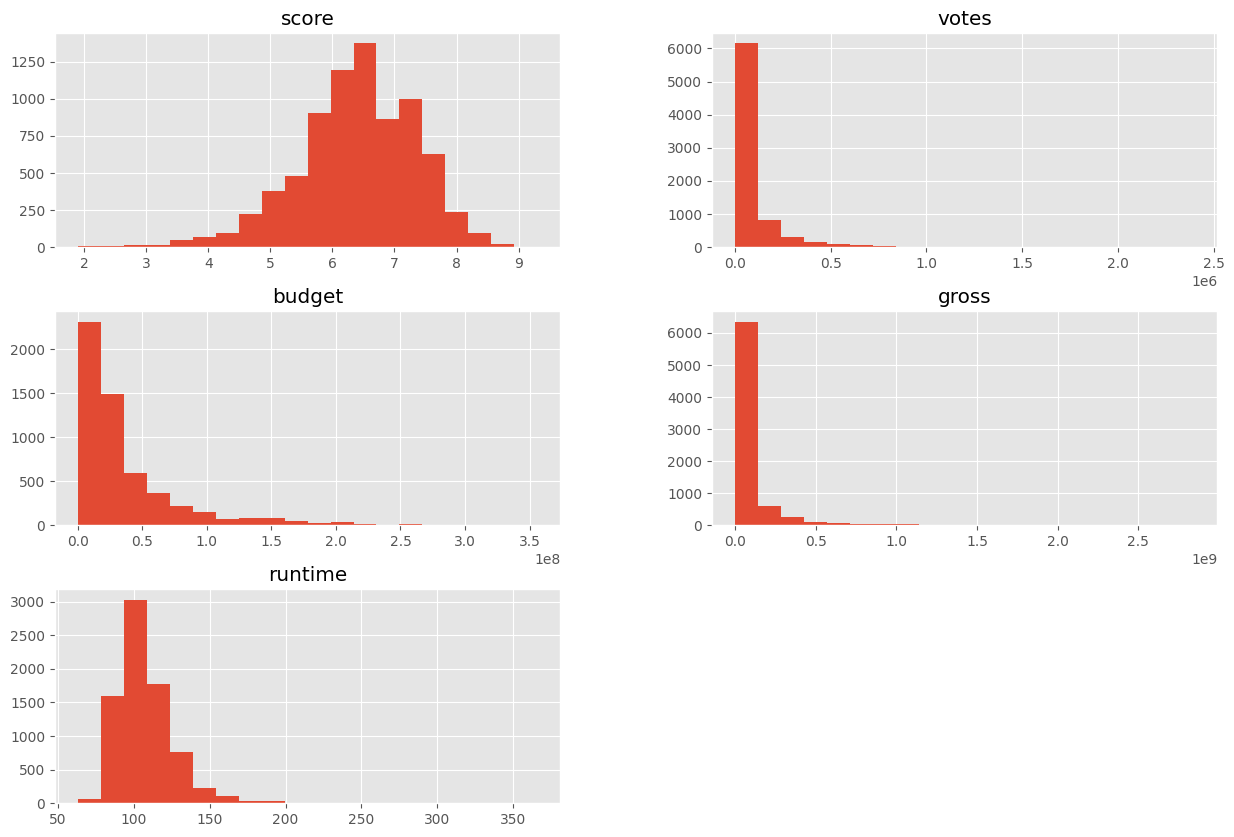

In [41]:

df.hist(bins=20, figsize=(15, 10))
plt.title('Distribution of numeric features')
plt.show()

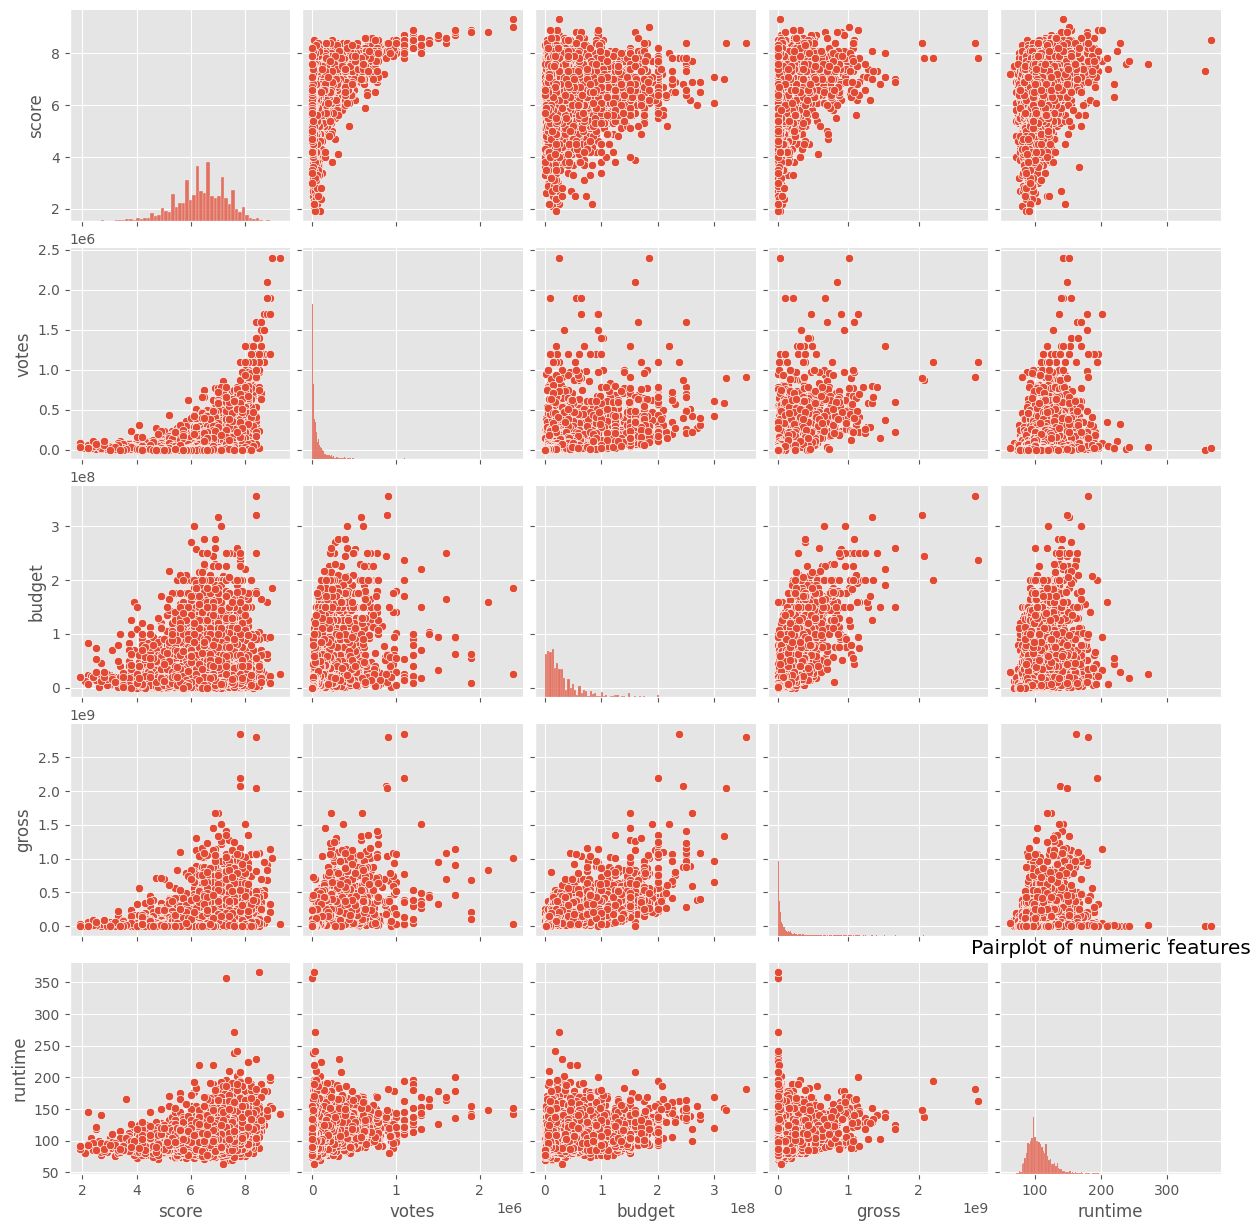

In [44]:
sns.pairplot(df)
# plt.title('Pairplot of numeric features')
plt.show()

<Axes: ylabel='votes'>

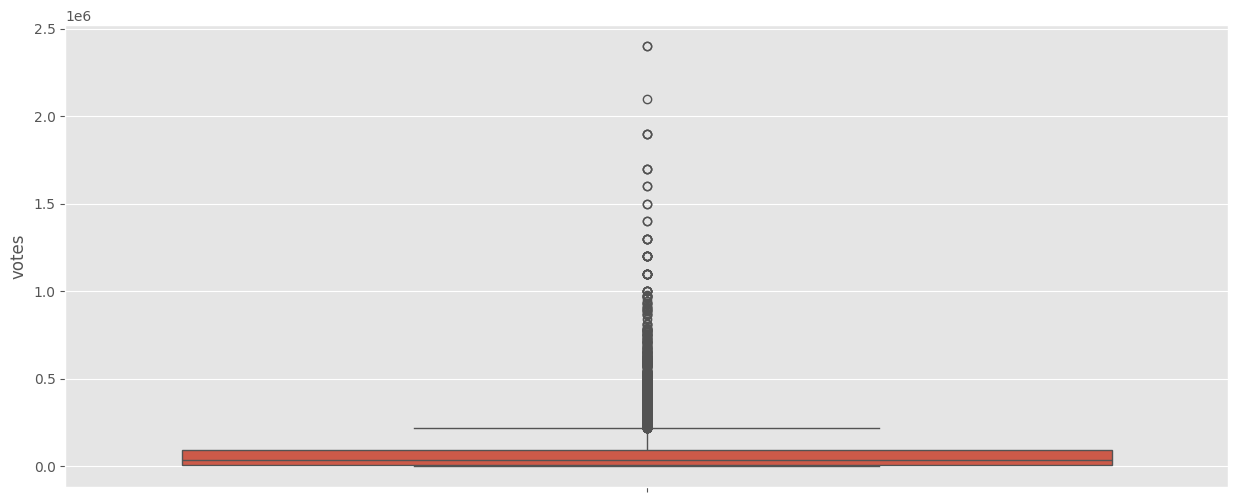

In [49]:
sns.boxplot(df['votes'])  # score, votes, budget, gross, runtime
plt.show()

<Axes: ylabel='votes'>

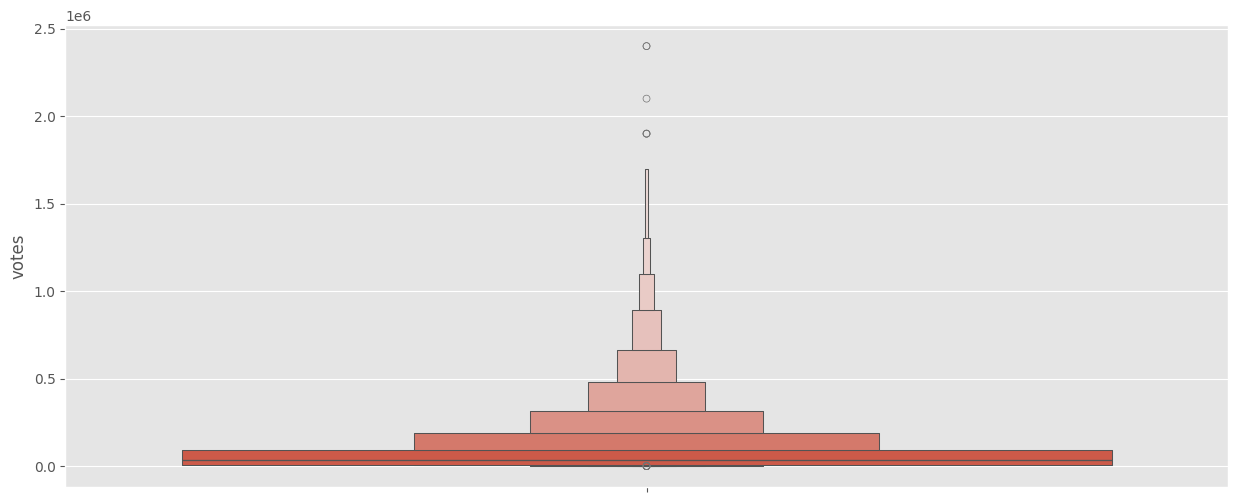

In [52]:
sns.boxenplot(df['votes'])  # score, votes, budget, gross, runtime
plt.show()

## 2. Correlation

In [18]:
df_corr = df.corr(method='pearson', numeric_only=True)  # pearson, kendall, spearman
df_corr

,score,votes,budget,gross,runtime
score,1.000000,0.409476,0.075988,0.186258,0.400357
votes,0.409476,1.000000,0.442223,0.630757,0.309077
budget,0.075988,0.442223,1.000000,0.740395,0.320197
gross,0.186258,0.630757,0.740395,1.000000,0.245231
runtime,0.400357,0.309077,0.320197,0.245231,1.000000


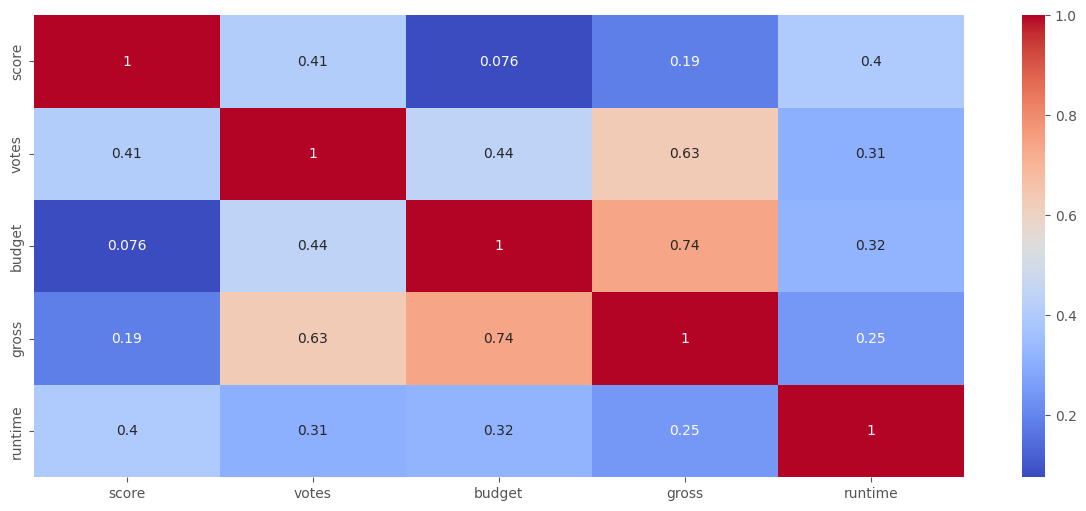

In [19]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

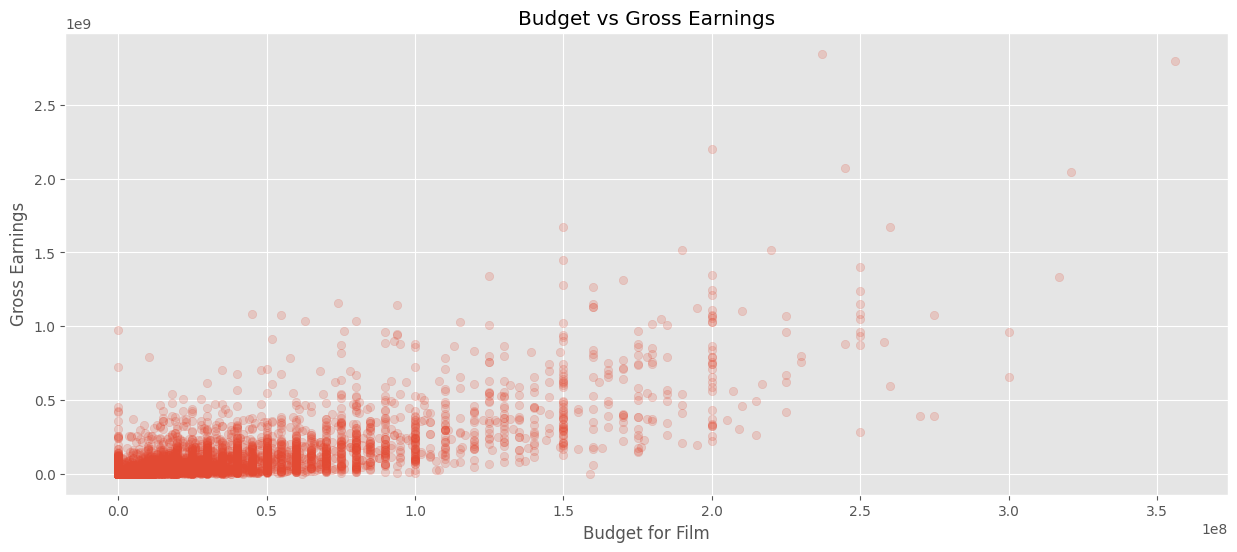

In [20]:
plt.scatter(x=old_df['budget'], y=old_df['gross'], alpha=0.2)
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.title('Budget vs Gross Earnings')
plt.show()

In [21]:
df['gross'].dtype

dtype('float64')

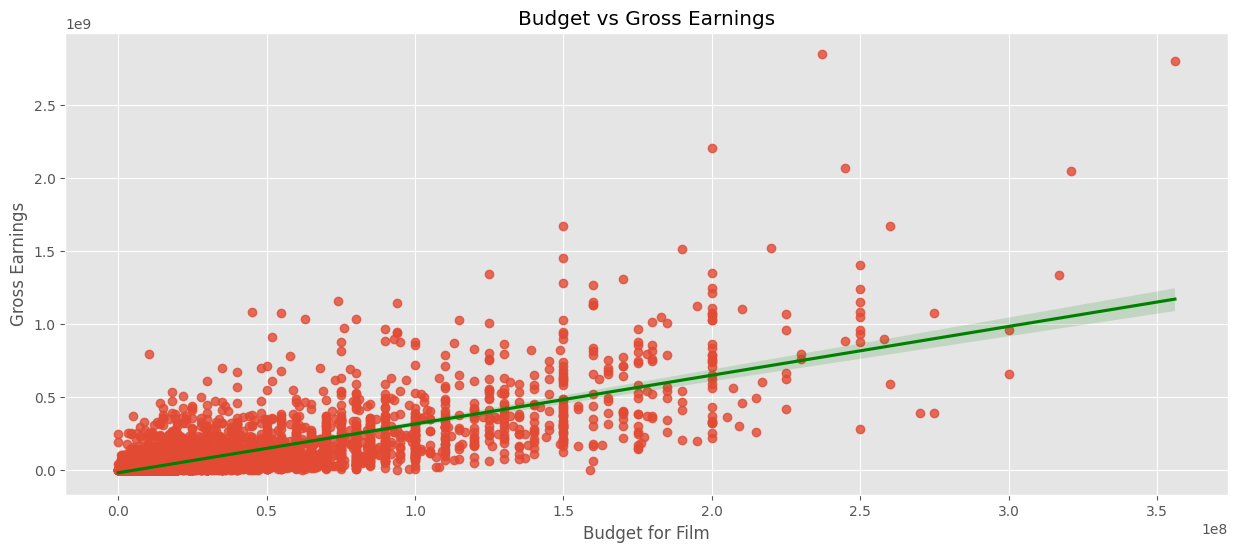

In [22]:
sns.regplot(data=df, x='budget', y='gross', line_kws={'color': 'green'})
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.title('Budget vs Gross Earnings')
plt.show()

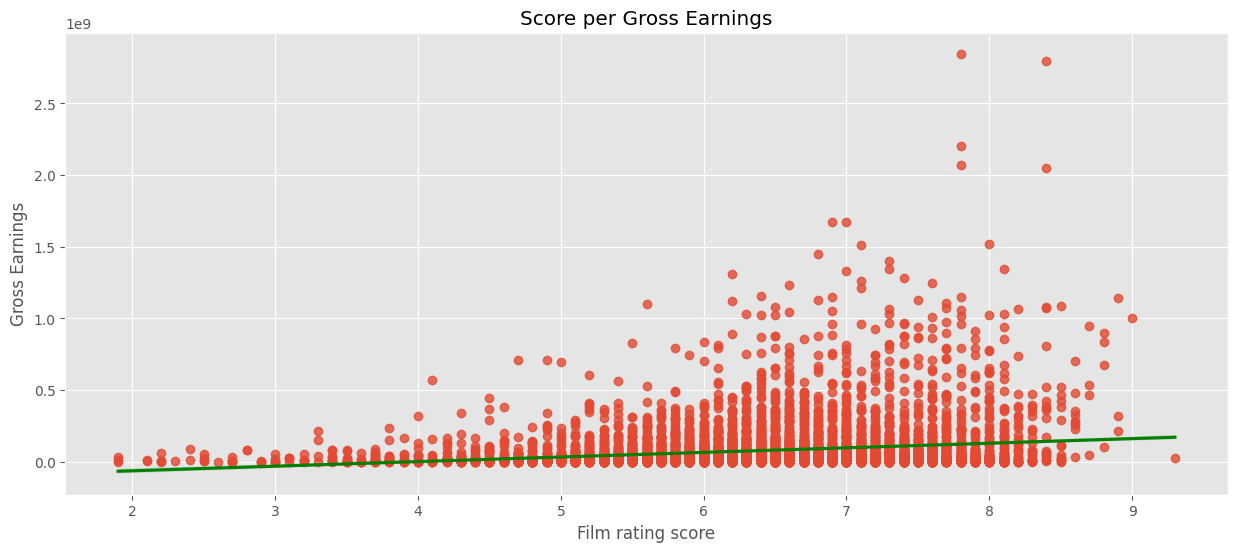

In [26]:
sns.regplot(data=df, x='score', y='gross', line_kws={'color': 'green'})
plt.xlabel('Film rating score')
plt.ylabel('Gross Earnings')
plt.title('Score per Gross Earnings')
plt.show()

In [24]:
df_num = df.copy()

for col in df_num.columns:
    if(df_num[col].dtype == 'object'):
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col].cat.codes
df_num.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6579,5,6,1508,8.4,927000,2583,4008,1045,54,19000000.0,46998772.0,2316,146.0
1,5567,5,1,1309,5.8,65000,2264,1630,326,55,4500000.0,58853106.0,730,104.0
2,5136,3,0,1566,8.7,1200000,1110,2562,1742,55,18000000.0,538375067.0,1537,124.0
3,286,3,4,1309,7.7,221000,1299,1997,2241,55,3500000.0,83453539.0,1809,88.0
4,1027,5,4,1358,7.3,108000,1053,520,409,55,6000000.0,39846344.0,1774,98.0


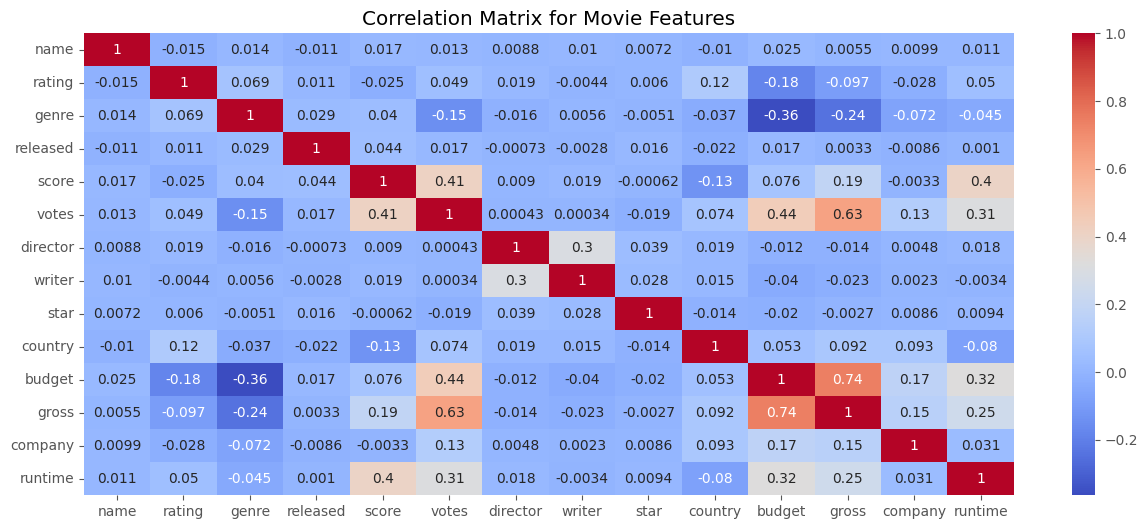

In [25]:
df_num_corr = df_num.corr(method='pearson')
sns.heatmap(df_num_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Movie Features')
plt.show()